<a href="https://colab.research.google.com/github/KHANmdAFFAN/Data_science/blob/main/turnover.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes = True)
from sklearn import preprocessing
from sklearn.linear_model import TweedieRegressor

In [ ]:
df=pd.read_csv("/content/turnover.csv")

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## EDA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
print("the numbers of rows and columns : ", df.shape)

the numbers of rows and columns :  (14999, 10)


In [ ]:
df.isnull().sum()   # no null values are present in the data

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

## TARGET COLUMN LEFT

In [ ]:
print("max of left: " ,df['left'].max())
print("min of left : " ,df['left'].min())
print("Standard deviation : " ,df['left'].std())
print("Mean of left : " ,df['left'].mean())
print("Median of left : " ,df['left'].median())
print("Variance of left : " ,df['left'].var())

max of left:  1
min of left :  0
Standard deviation :  0.4259240993802994
Mean of left :  0.2380825388359224
Median of left :  0.0
Variance of left :  0.18141133843291915


In [ ]:
df['left'].value_counts() #-----person left the company 11428
                          #------ person working in the company is 3571

0    11428
1     3571
Name: left, dtype: int64

PLOT SHOWING PEOPLE LEFT FROM THE COMPANY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


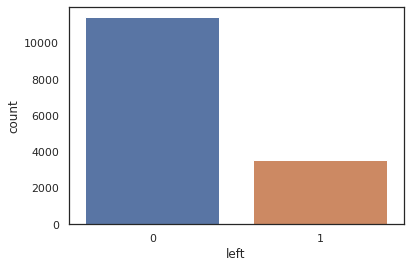

In [ ]:
sns.set_style('white')
sns.countplot(df['left'])

In [ ]:
df['left'].value_counts()/len(df['left'])

0    0.761917
1    0.238083
Name: left, dtype: float64

### Left VS Sales

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


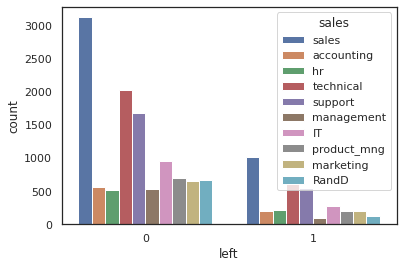

In [ ]:
sns.set_style('white')
sns.countplot(df['left'],hue=df['sales'])

In [ ]:
df['sales'].value_counts()/len(df)*100

sales          27.601840
technical      18.134542
support        14.860991
IT              8.180545
product_mng     6.013734
marketing       5.720381
RandD           5.247016
accounting      5.113674
hr              4.926995
management      4.200280
Name: sales, dtype: float64

### LEFT VS SALARY

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


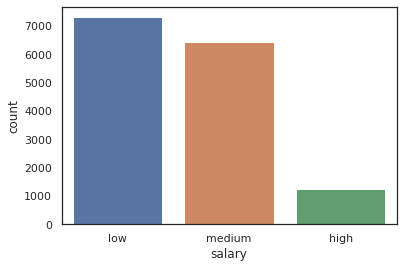

In [ ]:
sns.countplot(df['salary'])

In [ ]:
df['salary'].value_counts()/len(df)*100

low       48.776585
medium    42.976198
high       8.247216
Name: salary, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


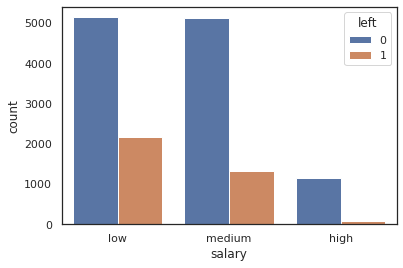

In [ ]:
sns.countplot(df['salary'], hue = df['left'])

LEFT VS WORK_ACCIDENT

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


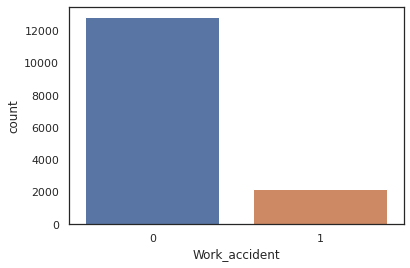

In [ ]:
sns.countplot(df['Work_accident'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


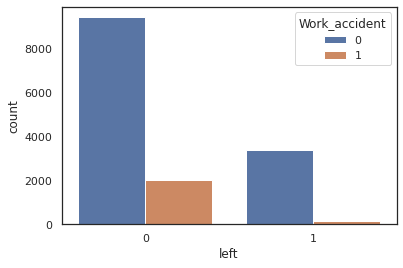

In [ ]:
sns.set_style('white')
sns.countplot(df['left'],hue=df['Work_accident'])

### lEFT VS time_spend_company

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


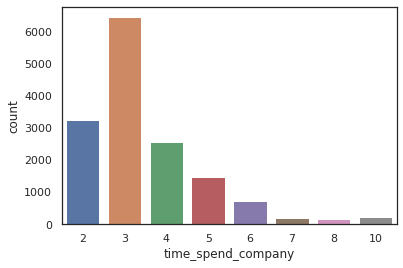

In [ ]:
sns.countplot(df['time_spend_company'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


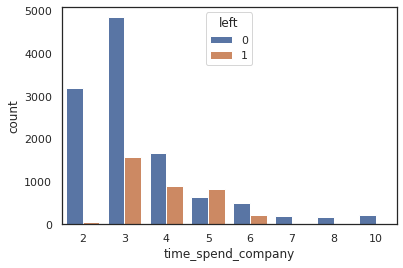

In [ ]:
sns.set_style('white')
sns.countplot(df['time_spend_company'],hue=df['left'])

## LEFT VS NUMBER_PROJECTS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


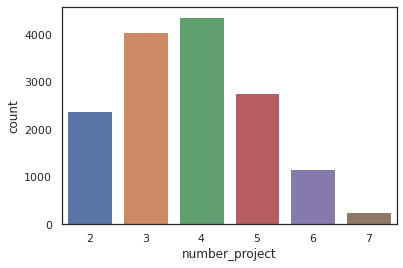

In [ ]:
sns.countplot(df['number_project'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


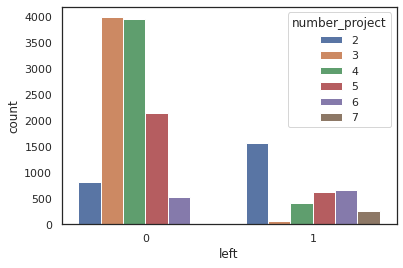

In [ ]:
sns.set_style('white')
sns.countplot(df['left'],hue=df['number_project'])   

In [ ]:
df['number_project'].value_counts()/len(df)*100

4    29.101940
3    27.035136
5    18.407894
2    15.921061
6     7.827188
7     1.706780
Name: number_project, dtype: float64

### LEFT VS PROMOTION

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


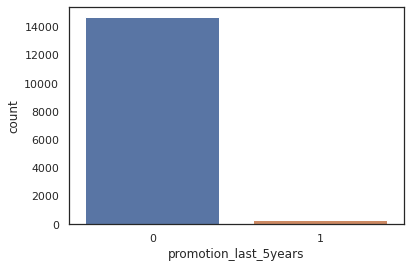

In [ ]:
sns.countplot(df['promotion_last_5years'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


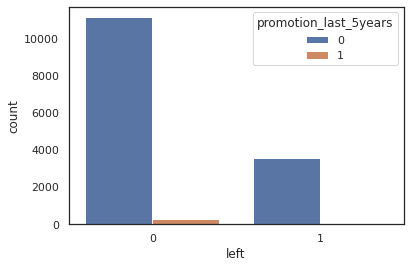

In [ ]:
sns.set_style('white')
sns.countplot(df['left'],hue=df['promotion_last_5years'])

FINDING SKEWNESS 

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. A value between 0.5 and 1 or -0.5 and -1 is moderately skewed. A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
def turnover_plot(value):
  turn_plot=sns.displot(value,kde=True)
  return turn_plot

Satisfaction_level

In [ ]:
from scipy.stats import skew

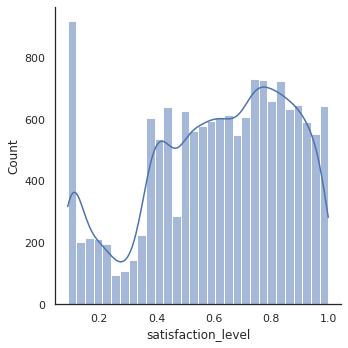

In [ ]:
turnover_plot(df['satisfaction_level'])   #----satisfaction_level is not skewed because it is lying between -0.5 to 0.5

In [ ]:
print("The skewness value of statisfaction level : ", df['satisfaction_level'].skew())

The skewness value of statisfaction level :  -0.4763603412839644


## last_evaluation

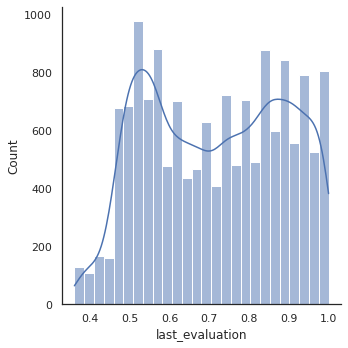

In [ ]:
turnover_plot(df['last_evaluation'])

In [ ]:
print("The skewness value oflast_evaluation  : ", df['last_evaluation'].skew())  # last_evaluation plot is not skewed

The skewness value oflast_evaluation  :  -0.02662174986376086


## number_project

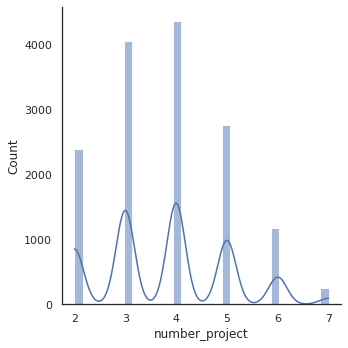

In [ ]:
turnover_plot(df['number_project'])

In [ ]:
print("The skewness value of number_project  : ",df['number_project'].skew())  # number_project is not skewed

The skewness value of number_project  :  0.3377056123598222


## average_montly_hours

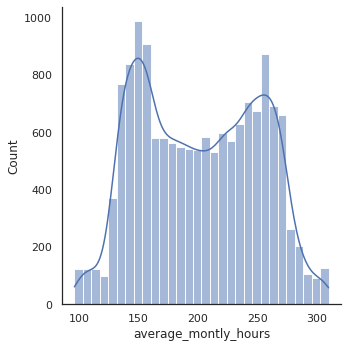

In [ ]:
turnover_plot(df['average_montly_hours'])

In [ ]:
print("The skewness value of average_montly_hours  : ",df['average_montly_hours'].skew())

The skewness value of average_montly_hours  :  0.0528419894163242


## FINDING OUTLIER

In [ ]:
def outlier(values):
  Q1 = values.quantile(0.25)
  Q3 = values.quantile(0.75)
  IQR = Q3-Q1
  lower_limit = Q1 - 1.5*IQR
  upper_limit = Q3 + 1.5*IQR
  lower_limit,upper_limit
  print("IQR,lower_limit,upper_limit")
  return IQR,lower_limit,upper_limit



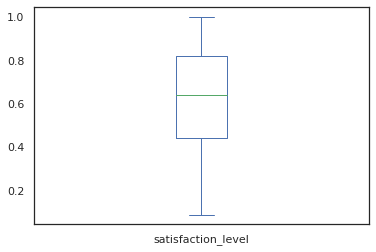

In [ ]:
df['satisfaction_level'].plot.box()  # no outlier

In [ ]:
outlier(df['satisfaction_level'])

IQR,lower_limit,upper_limit


(0.37999999999999995, -0.12999999999999995, 1.39)

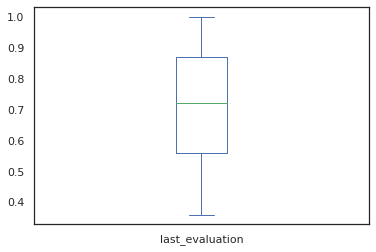

In [ ]:
df['last_evaluation'].plot.box()   #---- no outlier present

In [ ]:
outlier(df['last_evaluation'])

IQR,lower_limit,upper_limit


(0.30999999999999994, 0.09500000000000014, 1.335)

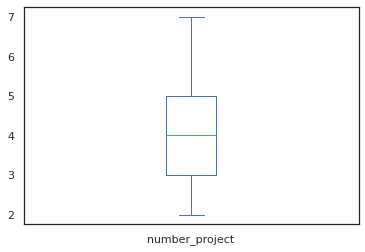

In [ ]:
df['number_project'].plot.box()

In [ ]:
outlier(df['number_project'])

IQR,lower_limit,upper_limit


(2.0, 0.0, 8.0)

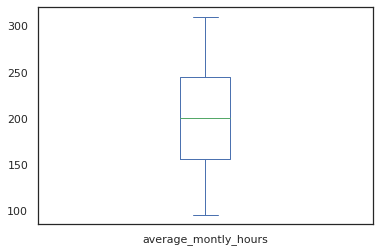

In [ ]:
df['average_montly_hours'].plot.box()

In [ ]:
outlier(df['average_montly_hours'])

IQR,lower_limit,upper_limit


(89.0, 22.5, 378.5)

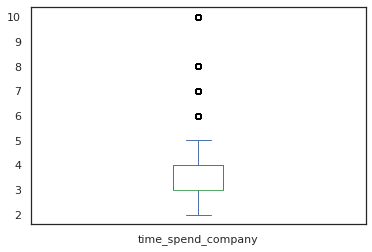

In [ ]:
df['time_spend_company'].plot.box()

In [ ]:
outlier(df['time_spend_company'])  # outlier present in time_spend_company

IQR,lower_limit,upper_limit


(1.0, 1.5, 5.5)

In [ ]:
Q1 = df['time_spend_company'].quantile(0.25)
Q3 = df['time_spend_company'].quantile(0.75)
IQR = Q3-Q1
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit,upper_limit
resolve_outlier = df[(df['time_spend_company']<lower_limit)|(df['time_spend_company']>upper_limit)]

In [ ]:
no_outlier =  df[(df['time_spend_company']>lower_limit)&(df['time_spend_company']<upper_limit)]
no_outlier.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low


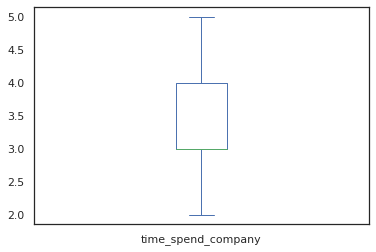

In [ ]:
no_outlier['time_spend_company'].plot.box()

ONE HOT CODING

In [ ]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
df['sales'].value_counts()


sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [ ]:
df['sales'].nunique()

10

In [ ]:
df['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

### OneHotEncoding using Pandas

In [ ]:
df_ohe=pd.get_dummies(df,columns=['salary','sales'])

In [ ]:
df_ohe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_high,salary_low,...,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0,1,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0


N-1 HOTENCODING

In [ ]:
df_ohe=pd.get_dummies(df,columns=['salary','sales'],drop_first=True)   # to remove multicollinarity you cant let your column to have mathmatical relationship

In [ ]:
df_ohe

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,salary_low,salary_medium,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical
0,0.38,0.53,2,157,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,0,1,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,0,1,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,1,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,1,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
print("NUmbers of rows and columns in dataframe : ", df_ohe.shape)

NUmbers of rows and columns in dataframe :  (14999, 19)


In [ ]:
df_ohe.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
salary_low                 2
salary_medium              2
sales_RandD                2
sales_accounting           2
sales_hr                   2
sales_management           2
sales_marketing            2
sales_product_mng          2
sales_sales                2
sales_support              2
sales_technical            2
dtype: int64

In [ ]:
df_ohe.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
salary_low               0
salary_medium            0
sales_RandD              0
sales_accounting         0
sales_hr                 0
sales_management         0
sales_marketing          0
sales_product_mng        0
sales_sales              0
sales_support            0
sales_technical          0
dtype: int64

In [ ]:
df_ohe.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'salary_low', 'salary_medium', 'sales_RandD',
       'sales_accounting', 'sales_hr', 'sales_management', 'sales_marketing',
       'sales_product_mng', 'sales_sales', 'sales_support', 'sales_technical'],
      dtype='object')

### SPLITING DATASET IN 80/20 

In [ ]:
X = df_ohe.drop(['left'],axis=1).values
Y = df_ohe['left'].values

In [ ]:
print("the dimension of X :",X.ndim)
print("the dimension of Y : ",Y.ndim)

the dimension of X : 2
the dimension of Y :  1


In [ ]:
print(X)

[[0.38 0.53 2.   ... 1.   0.   0.  ]
 [0.8  0.86 5.   ... 1.   0.   0.  ]
 [0.11 0.88 7.   ... 1.   0.   0.  ]
 ...
 [0.37 0.53 2.   ... 0.   1.   0.  ]
 [0.11 0.96 6.   ... 0.   1.   0.  ]
 [0.37 0.52 2.   ... 0.   1.   0.  ]]


In [ ]:
print(Y)

[1 1 1 ... 1 1 1]


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state = 0)

In [ ]:
print("the dimension of X :",X_train.ndim)
print("the dimension of Y : ",Y_train.ndim)

the dimension of X : 2
the dimension of Y :  1


In [ ]:
X_train

array([[0.75, 0.81, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.13, 0.91, 2.  , ..., 1.  , 0.  , 0.  ],
       [0.67, 0.74, 3.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.69, 0.94, 5.  , ..., 0.  , 0.  , 0.  ],
       [0.78, 0.59, 5.  , ..., 0.  , 0.  , 1.  ],
       [0.56, 0.68, 5.  , ..., 0.  , 0.  , 0.  ]])

In [ ]:
Y_train

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
X_test

array([[0.44, 0.57, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.55, 0.96, 3.  , ..., 0.  , 0.  , 0.  ],
       [0.72, 0.67, 5.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [0.37, 0.54, 2.  , ..., 0.  , 0.  , 0.  ],
       [0.52, 0.61, 4.  , ..., 0.  , 0.  , 1.  ],
       [0.13, 0.65, 4.  , ..., 0.  , 1.  , 0.  ]])

In [ ]:
Y_test

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
X_train.shape , Y_train.shape

((11999, 18), (11999,))

In [ ]:
X_test.shape, Y_test.shape

((3000, 18), (3000,))

TRAIN  THE MODEL ON TRAINING SET

In [ ]:
from sklearn.preprocessing import StandardScaler 

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression( fit_intercept=True)
lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
y_pred = lr.predict(X_test)
print(y_pred)

[0 0 0 ... 0 0 1]


In [ ]:
lr.score(X_test,Y_test)

0.7876666666666666

In [ ]:
lr.predict_proba(X_test)

array([[0.68791526, 0.31208474],
       [0.73952049, 0.26047951],
       [0.95266227, 0.04733773],
       ...,
       [0.72847885, 0.27152115],
       [0.76015733, 0.23984267],
       [0.34518679, 0.65481321]])

### CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(Y_test,y_pred)   # Y_test = actual value   y_pred = predicted value

array([[2133,  166],
       [ 471,  230]])

In [ ]:
confusion_matrix(Y_test,Y_test)    # perfect prediction ----- ideal matrix

array([[2299,    0],
       [   0,  701]])

### PRECISION AND RECALL 

In [ ]:
from sklearn.metrics import precision_score, recall_score

PRECISION SCORE

In [ ]:
print("Precision score : ", precision_score(Y_test,y_pred))  # real prediction

Precision score :  0.5808080808080808


In [ ]:
print("Precision score when confusion matrix is ideal : ", precision_score(Y_test,Y_test)) # ideal prediction which cant be true in real world

Precision score when confusion matrix is ideal :  1.0


RECALL SCORE

In [ ]:
print("Recall score : " , recall_score(Y_test,y_pred))

Recall score :  0.3281027104136947


### F1-SCORE

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
print("f1-score : ",f1_score(Y_test,y_pred))

f1-score :  0.41932543299908837


In [ ]:
print("Ideal situation of f1-score which cant be true : ",f1_score(Y_test,Y_test))

Ideal situation of f1-score which cant be true :  1.0


### ROC CURVE

In [ ]:
from sklearn import datasets, metrics, model_selection, svm    

In [ ]:
clf = svm.SVC(random_state=0)
clf.fit(X_train, Y_train)


SVC(random_state=0)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


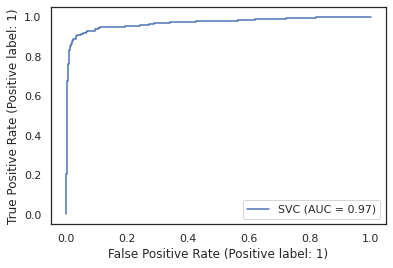

In [ ]:
metrics.plot_roc_curve(clf, X_test, Y_test)
plt.show()


CROSS VALIDATION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,train_size=0.8,random_state = 0)

### LogisticRegression

In [ ]:
lr = LogisticRegression( fit_intercept=True)
lr.fit(X_train,Y_train)
lr.score(X_test,Y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


0.8006666666666666

### SVC

In [ ]:
svm = SVC()
svm.fit(X_train,Y_train)
svm.score(X_test,Y_test)

0.785

RANDOM FOREST

In [ ]:
rf=RandomForestClassifier(n_estimators = 40)
rf.fit(X_train,Y_train)
rf.score(X_test,Y_test)

0.9913333333333333

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(LogisticRegression(),X,Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([0.80866667, 0.80266667, 0.81833333, 0.80166667, 0.66422141])

In [ ]:
cross_val_score(SVC(),X,Y)

array([0.77966667, 0.78033333, 0.78066667, 0.78366667, 0.7825942 ])

In [ ]:
cross_val_score(RandomForestClassifier(),X,Y)

array([0.999     , 0.97833333, 0.98333333, 0.99933333, 0.99466489])

In [ ]:
score1 = cross_val_score(LogisticRegression(),X,Y,cv=10)
np.average(score1)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


0.7965831443184345

In [ ]:
score2 = cross_val_score(SVC(),X,Y,cv=10)
np.average(score2)

0.7835187013564597

In [ ]:
score3 = cross_val_score(RandomForestClassifier(),X,Y , cv=10)
np.average(score3)

0.9924

In [ ]:
score3 = cross_val_score(RandomForestClassifier(n_estimators=40),X,Y , cv=10)
np.average(score3)

0.9921332888592396

In [ ]:
score3 = cross_val_score(RandomForestClassifier(n_estimators=100),X,Y , cv=10)
np.average(score3)

0.9924666666666667